# Study the data statistics of the ellie dataset.
29.11.2023

In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# Please replace the following paths with your own paths if you are using different ones.
PROJECT_PATH = "/mount/studenten/arbeitsdaten-studenten1/semantic-plausibility/plausible-parrots/"
DATA_PATH = "/mount/studenten/semantic-plausibility/datasets/ellie/evaluation-dataset/"
CACHE_PATH = PROJECT_PATH + "cache/"

In [4]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', cache_dir=CACHE_PATH)

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.


## Ellie has only an eval set.

In [5]:
eval_set_df = pd.read_csv(DATA_PATH + "ELLie-reformatted.csv", sep=',')
eval_set_df

,ID,Condition,Sentence,Construction,Semantic_Role,binary-labels,multiclass-labels
0,1,T – T,"The photographer used the camera, and the repo...",VP-ellipsis,Agent,plausible,highly-plausible
1,1,T – AT,"The photographer used the camera, and the butc...",VP-ellipsis,Agent,plausible,plausible
2,1,AT – T,"The grandfather used the camera, and the repor...",VP-ellipsis,Agent,plausible,less-plausible
3,1,AT – AT,"The grandfather used the camera, and the butch...",VP-ellipsis,Agent,plausible,less-plausible
4,1,T – SP violation,"The photographer used the camera, and the bike...",VP-ellipsis,Agent,implausible,implausible
...,...,...,...,...,...,...,...
570,115,T – T,"The tourist packed his bags before departure, ...",Pseudo-gapping,Time,plausible,highly-plausible
571,115,T – AT,"The tourist packed his bags before departure, ...",Pseudo-gapping,Time,plausible,plausible
572,115,AT – T,The tourist packed his bags before the meeting...,Pseudo-gapping,Time,plausible,less-plausible
573,115,AT – AT,The tourist packed his bags before the meeting...,Pseudo-gapping,Time,plausible,less-plausible


In [7]:
eval_set_df.iloc[0].values

array(['1', 'T – T',
       'The photographer used the camera, and the reporter did too.',
       'VP-ellipsis', 'Agent', 'plausible', 'highly-plausible'],
      dtype=object)

### Check conditions

In [5]:
conditions = eval_set_df['Condition'].tolist()
print(len(conditions))
conditions_set = list(set(conditions))
print(len(conditions_set))
conditions_set

575
5


['T – T', 'AT – AT', 'T – AT', 'AT – T', 'T – SP violation']

In [6]:
condition_counter = dict(Counter(conditions))

# Sort the data in descending order.
condition_counter = {k: v for k, v in sorted(condition_counter.items(), key=lambda item: item[1], reverse=True)}
condition_counter

{'T – T': 115,
 'T – AT': 115,
 'AT – T': 115,
 'AT – AT': 115,
 'T – SP violation': 115}

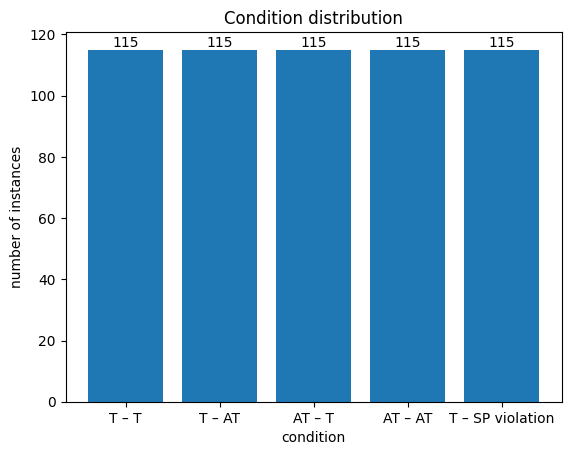

In [7]:
# Create a bar diagram
plt.bar(condition_counter.keys(), condition_counter.values())

# Add title and labels
plt.title('Condition distribution')
plt.xlabel('condition')
plt.ylabel('number of instances')

# Show the value on top of each bar
for key, value in condition_counter.items():
    plt.text(key, value, f'{value}', ha='center', va='bottom')

# Display the plot
plt.show()

### Check sentences

In [8]:
sentences = eval_set_df['Sentence'].tolist()
print(len(sentences))
sentences_set = list(set(sentences))
print(len(sentences_set))

575
573


In [9]:
sentence_lengths = []
for sent in sentences:
    encoded_input = tokenizer(sent, add_special_tokens=False)['input_ids']
    sentence_lengths.append(len(encoded_input))
print(sentence_lengths)

[12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 12, 14, 12, 11, 12, 12, 13, 13, 12, 16, 18, 14, 16, 16, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 14, 14, 16, 16, 14, 12, 12, 13, 13, 12, 13, 13, 14, 14, 13, 14, 14, 15, 15, 14, 14, 14, 14, 14, 14, 12, 12, 12, 12, 12, 15, 15, 12, 12, 15, 15, 15, 15, 15, 15, 13, 14, 13, 14, 13, 13, 12, 13, 12, 12, 13, 12, 13, 12, 12, 13, 13, 13, 13, 13, 16, 14, 16, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 14, 15, 14, 14, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 12, 12, 12, 12, 13, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 13, 13, 14, 15, 14, 15, 14, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 14, 14, 14, 14, 14, 13, 13, 14, 14, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 13, 13, 14, 14, 13, 14, 14, 17, 17, 14, 15, 15, 15, 15, 15, 15, 15, 15, 14, 15, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17, 17, 17, 17, 17, 13, 13, 13, 13, 13, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,

In [10]:
sentence_lengths = np.asarray(sentence_lengths)

# average length
print('average length:', sentence_lengths.mean())

# min length
print('min length:', sentence_lengths.min())

# max length
print('max length:', sentence_lengths.max())

# variance
print('variance:', sentence_lengths.var())

# std
print('std:', sentence_lengths.std())

average length: 15.86608695652174
min length: 11
max length: 23
variance: 6.592502079395085
std: 2.5675868202253813


### Check constructions

In [11]:
constructions = eval_set_df['Construction'].tolist()
print(len(constructions))
constructions_set = list(set(constructions))
print(len(constructions_set))
constructions_set

575
6


['Pseudo-gapping',
 'Sluicing',
 'VP-ellipsis',
 'Sluice-Stranding',
 'Do-x/ Do-so anaphora',
 'Gapping']

In [12]:
construction_counter = dict(Counter(constructions))

# Sort the data in descending order.
construction_counter = {k: v for k, v in sorted(construction_counter.items(), key=lambda item: item[1], reverse=True)}
construction_counter

{'Gapping': 155,
 'Pseudo-gapping': 150,
 'VP-ellipsis': 110,
 'Do-x/ Do-so anaphora': 110,
 'Sluicing': 25,
 'Sluice-Stranding': 25}

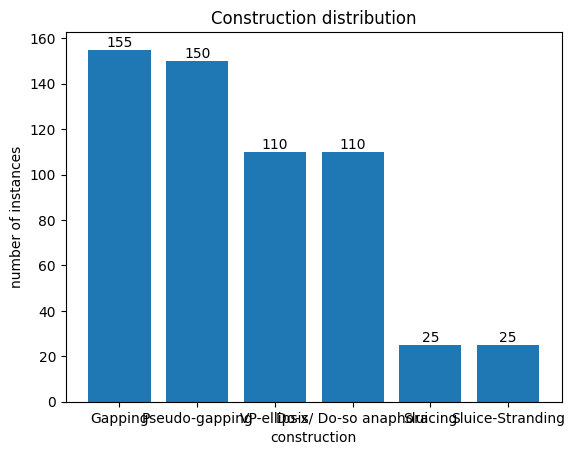

In [13]:
# Create a bar diagram
plt.bar(construction_counter.keys(), construction_counter.values())

# Add title and labels
plt.title('Construction distribution')
plt.xlabel('construction')
plt.ylabel('number of instances')

# Show the value on top of each bar
for key, value in construction_counter.items():
    plt.text(key, value, f'{value}', ha='center', va='bottom')

# Display the plot
plt.show()

### Check semantic role

In [14]:
semantic_roles = eval_set_df['Semantic_Role'].tolist()
print(len(semantic_roles))
semantic_roles_set = list(set(semantic_roles))
print(len(semantic_roles_set))

575
5


In [15]:
semantic_role_counter = dict(Counter(semantic_roles))

# Sort the data in descending order.
semantic_role_counter = {k: v for k, v in sorted(semantic_role_counter.items(), key=lambda item: item[1], reverse=True)}
semantic_role_counter

{'Agent': 125, 'Patient': 125, 'Instrument': 125, 'Location': 100, 'Time': 100}

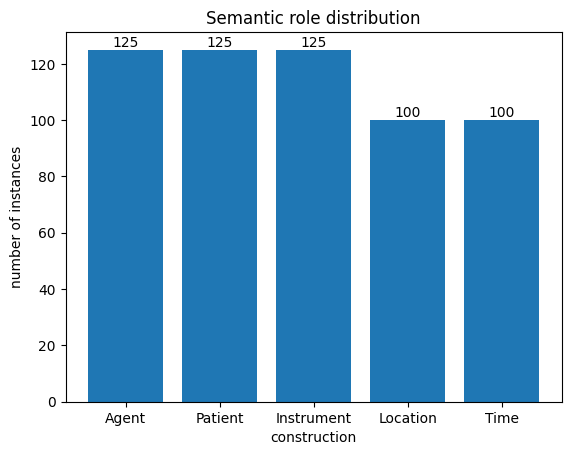

In [16]:
# Create a bar diagram
plt.bar(semantic_role_counter.keys(), semantic_role_counter.values())

# Add title and labels
plt.title('Semantic role distribution')
plt.xlabel('construction')
plt.ylabel('number of instances')

# Show the value on top of each bar
for key, value in semantic_role_counter.items():
    plt.text(key, value, f'{value}', ha='center', va='bottom')

# Display the plot
plt.show()

### Check binary labels

In [20]:
binary_labels = eval_set_df['binary-labels'].tolist()
print(len(binary_labels))
binary_labels_set = list(set(binary_labels))
print(len(binary_labels_set))
binary_labels_set

575
2


['implausible', 'plausible']

In [21]:
binary_label_counter = dict(Counter(binary_labels))

# Sort the data in descending order.
binary_label_counter = {k: v for k, v in sorted(binary_label_counter.items(), key=lambda item: item[1], reverse=True)}
binary_label_counter

{'plausible': 460, 'implausible': 115}

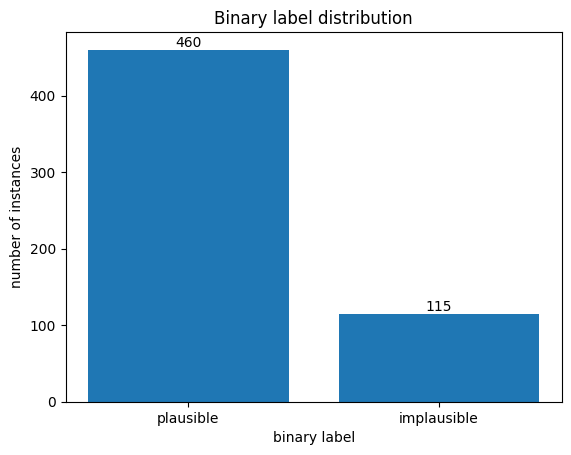

In [22]:
# Create a bar diagram
plt.bar(binary_label_counter.keys(), binary_label_counter.values())

# Add title and labels
plt.title('Binary label distribution')
plt.xlabel('binary label')
plt.ylabel('number of instances')

# Show the value on top of each bar
for key, value in binary_label_counter.items():
    plt.text(key, value, f'{value}', ha='center', va='bottom')

# Display the plot
plt.show()

### Check multiclass-labels

In [23]:
multiclass_labels = eval_set_df['multiclass-labels'].tolist()
print(len(multiclass_labels))
multiclass_labels_set = list(set(multiclass_labels))
print(len(multiclass_labels_set))
multiclass_labels_set

575
4


['plausible', 'less-plausible', 'implausible', 'highly-plausible']

In [24]:
multiclass_label_counter = dict(Counter(multiclass_labels))

# Sort the data in descending order.
multiclass_label_counter = {k: v for k, v in sorted(multiclass_label_counter.items(), key=lambda item: item[1], reverse=True)}
multiclass_label_counter

{'less-plausible': 230,
 'highly-plausible': 115,
 'plausible': 115,
 'implausible': 115}

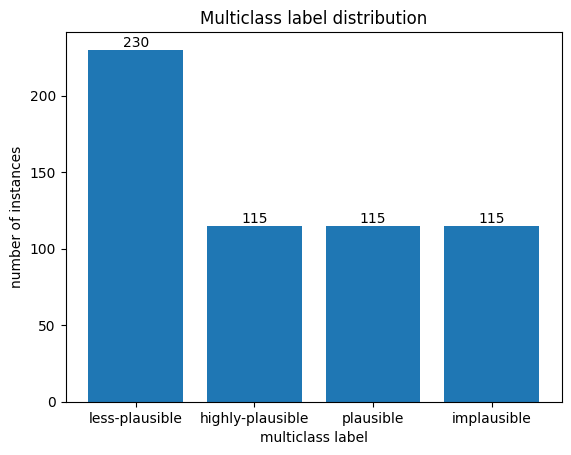

In [25]:
# Create a bar diagram
plt.bar(multiclass_label_counter.keys(), multiclass_label_counter.values())

# Add title and labels
plt.title('Multiclass label distribution')
plt.xlabel('multiclass label')
plt.ylabel('number of instances')

# Show the value on top of each bar
for key, value in multiclass_label_counter.items():
    plt.text(key, value, f'{value}', ha='center', va='bottom')

# Display the plot
plt.show()